In [1]:
import warnings; warnings.simplefilter('ignore')
from dcr import *
%matplotlib inline

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams.update({'font.size': 16})

In [2]:
data= pd.read_csv('dcr.csv')

In [3]:
data.head()

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res
0,4,25,-2,25,119,NaN,61031.10,33.911009,10.500,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
1,4,26,-2,25,119,NaN,60882.42,34.007232,10.500,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
2,4,27,-2,25,119,NaN,60729.80,34.335349,10.500,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
3,4,28,-2,25,119,NaN,60576.14,34.672545,10.875,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
4,4,29,-2,25,119,NaN,60424.39,34.951639,10.875,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN


In [4]:
data.columns.values

array(['id', 'time', 'orig_time', 'first_time', 'mat_time', 'res_time',
       'balance_time', 'LTV_time', 'interest_rate_time', 'rate_time',
       'hpi_time', 'gdp_time', 'uer_time', 'REtype_CO_orig_time',
       'REtype_PU_orig_time', 'REtype_SF_orig_time', 'investor_orig_time',
       'balance_orig_time', 'FICO_orig_time', 'LTV_orig_time',
       'Interest_Rate_orig_time', 'state_orig_time', 'hpi_orig_time',
       'default_time', 'payoff_time', 'status_time', 'lgd_time',
       'recovery_res'], dtype=object)

In [5]:
data = data.query('time < 40').copy()

In [6]:
_, data_train, data_test, X_train_scaled, X_test_scaled, y_train, y_test = dataprep(data, depvar='default_time'
                                                                                    ,splitvar='time', threshold=26)

In [7]:
X_train_scaled.shape

(12702, 11)

In [8]:
X_test_scaled.shape

(26049, 11)

# Default Rate for training data

In [9]:
np.mean(y_train).round(4)

0.0104

# Default Rate for testing data

In [10]:
np.mean(y_test).round(4)

0.0355

In [11]:
data_in = data
depvar = 'default_time'
splitvar ='time'
threshold = 26

In [12]:
df = data_in.dropna(subset = ['time', 'default_time', 'LTV_time', 'FICO_orig_time']).copy()

In [13]:
df.head()

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res
0,4,25,-2,25,119,NaN,61031.10,33.911009,10.500,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
1,4,26,-2,25,119,NaN,60882.42,34.007232,10.500,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
2,4,27,-2,25,119,NaN,60729.80,34.335349,10.500,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
3,4,28,-2,25,119,NaN,60576.14,34.672545,10.875,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
4,4,29,-2,25,119,NaN,60424.39,34.951639,10.875,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN


# Economic features

In [14]:
df.columns.values

array(['id', 'time', 'orig_time', 'first_time', 'mat_time', 'res_time',
       'balance_time', 'LTV_time', 'interest_rate_time', 'rate_time',
       'hpi_time', 'gdp_time', 'uer_time', 'REtype_CO_orig_time',
       'REtype_PU_orig_time', 'REtype_SF_orig_time', 'investor_orig_time',
       'balance_orig_time', 'FICO_orig_time', 'LTV_orig_time',
       'Interest_Rate_orig_time', 'state_orig_time', 'hpi_orig_time',
       'default_time', 'payoff_time', 'status_time', 'lgd_time',
       'recovery_res'], dtype=object)

In [15]:
df.loc[:, 'annuity'] = ((df.loc[: , 'interest_rate_time'] / (100*4))*(df.loc[: , 'balance_orig_time'])) /(1 - (1 + df.loc[: , 'interest_rate_time']/ (100*4) )**((- df.loc[: ,'mat_time' ] - df.loc[: , 'orig_time'])))

In [16]:
df.loc[:, 'balance_schedule_time'] = df.loc[:, 'balance_orig_time']*(1 + df.loc[:, 'interest_rate_time']/(100*4)) ** (df.loc[:, 'time'] - df.loc[:,'orig_time'])-df.loc[:,'annuity']*((1 + df.loc[:, 'interest_rate_time']/(100*4)) ** (df.loc[:, 'time'] - df.loc[:,'orig_time']) - 1) / (df.loc[:, 'interest_rate_time']/(100*4))

In [17]:
df.loc[:, 'property_orig_time'] = df.loc[:, 'balance_orig_time'] / (df.loc[:, 'LTV_orig_time']/100)

In [18]:
df.loc[:, 'cep_time'] = (df.loc[:,'balance_schedule_time'] - df.loc[:, 'balance_time']) / df.loc[:, 'property_orig_time']

In [19]:
df.loc[:, 'equity_time'] = 1 - (df.loc[:, 'LTV_time']/100)

In [20]:
df = df.dropna(subset = ['time', 'cep_time', 'equity_time'])

In [21]:
df.loc[:, 'age'] = (df.loc[:, 'time'] - df.loc[:, 'first_time'] + 1)
df.loc[df['age'] >= 40, 'age' ] = 40
df.loc[:, 'age_l'] = df.loc[:, 'time'] - df.loc[:, 'first_time'] 
df.loc[df['age_l'] >= 39, 'age_l' ] = 39
df.loc[:, 'age_lf'] = df.loc[:, 'age_l']
df.loc[df['age_lf'] <= 1, 'age_lf'] = 1
df.loc[:, 'age2'] = df.loc[:, 'age']**2

In [22]:
df['vintage'] = df.loc[:, 'orig_time']
df.loc[df['vintage'] < 0, 'vintage'] = 0
df.loc[df['vintage'] >= 30, 'vintage'] = 30

In [23]:
pd.Categorical(df['state_orig_time'])

['KY', 'KY', 'KY', 'KY', 'KY', ..., 'NY', 'NJ', 'NJ', 'NJ', 'NJ']
Length: 40539
Categories (52, object): ['AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY']

In [24]:
df.loc[:, 'state_orig_time'] = pd.Categorical(df.state_orig_time, ordered = False)


if depvar == 'default_time':
    df2 = df
    
    df2 = df2.dropna(subset =['state_orig_time']).copy()
    df2 = df2.loc[df2['state_orig_time'] != 'AL', :].copy()
    df2 = df2.loc[df2['state_orig_time'] != 'AK', :].copy()
    df2 = df2.loc[df2['state_orig_time'] != 'AR', :].copy()
    df2 = df2.loc[df2['state_orig_time'] != 'ND', :].copy()
    df2 = df2.loc[df2['state_orig_time'] != 'SD', :].copy()
    df2 = df2.loc[df2['state_orig_time'] != 'MT', :].copy()
    df2 = df2.loc[df2['state_orig_time'] != 'DE', :].copy()
    df2 = df2.loc[df2['state_orig_time'] != 'WV', :].copy()
    df2 = df2.loc[df2['state_orig_time'] != 'VT', :].copy()
    df2 = df2.loc[df2['state_orig_time'] != 'ME', :].copy()
    df2 = df2.loc[df2['state_orig_time'] != 'NE', :].copy()
    df2 = df2.loc[df2['state_orig_time'] != 'NH', :].copy()
    df2 = df2.loc[df2['state_orig_time'] != 'MS', :].copy()
    df2 = df2.loc[df2['state_orig_time'] != 'VI', :].copy()
    df2 = df2.loc[df2['state_orig_time'] != 'DC', :].copy()
    df2 = df2.loc[df2['state_orig_time'] != 'PR', :].copy()
    
df2.head(10)
    

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,annuity,balance_schedule_time,property_orig_time,cep_time,equity_time,age,age_l,age_lf,age2,vintage
0,4,25,-2,25,119,NaN,61031.10,33.911009,10.500,5.9,...,1758.249970,60477.168900,77933.98533,-0.007108,0.660890,1,0,1,1,0
1,4,26,-2,25,119,NaN,60882.42,34.007232,10.500,5.9,...,1758.249970,60306.444613,77933.98533,-0.007391,0.659928,2,1,1,4,0
2,4,27,-2,25,119,NaN,60729.80,34.335349,10.500,5.9,...,1758.249970,60131.238813,77933.98533,-0.007680,0.656647,3,2,2,9,0
3,4,28,-2,25,119,NaN,60576.14,34.672545,10.875,5.9,...,1811.740821,60179.216783,77933.98533,-0.005093,0.653275,4,3,3,16,0
4,4,29,-2,25,119,NaN,60424.39,34.951639,10.875,5.9,...,1811.740821,60003.598419,77933.98533,-0.005399,0.650484,5,4,4,25,0
5,4,30,-2,25,119,NaN,60268.48,35.621842,10.875,5.9,...,1811.740821,59823.205430,77933.98533,-0.005713,0.643782,6,5,5,36,0
6,4,31,-2,25,119,NaN,60108.28,37.662290,10.875,5.9,...,1811.740821,59637.908007,77933.98533,-0.006036,0.623377,7,6,6,49,0
7,4,32,-2,25,119,NaN,59944.71,40.496053,11.000,5.9,...,1829.666646,59532.537883,77933.98533,-0.005289,0.595039,8,7,7,64,0
8,4,33,-2,25,119,NaN,59778.68,41.636658,11.000,5.9,...,1829.666646,59340.016029,77933.98533,-0.005629,0.583633,9,8,8,81,0
9,4,34,-2,25,119,NaN,59603.76,43.231936,10.500,5.9,...,1758.249970,58769.034644,77933.98533,-0.010711,0.567681,10,9,9,100,0


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38770 entries, 0 to 61579
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38770 non-null  int64  
 1   time                     38770 non-null  int64  
 2   orig_time                38770 non-null  int64  
 3   first_time               38770 non-null  int64  
 4   mat_time                 38770 non-null  int64  
 5   res_time                 890 non-null    float64
 6   balance_time             38770 non-null  float64
 7   LTV_time                 38770 non-null  float64
 8   interest_rate_time       38770 non-null  float64
 9   rate_time                38770 non-null  float64
 10  hpi_time                 38770 non-null  float64
 11  gdp_time                 38770 non-null  float64
 12  uer_time                 38770 non-null  float64
 13  REtype_CO_orig_time      38770 non-null  int64  
 14  REtype_PU_orig_time      38

# Fitting of candidate models and validation

In [26]:
model_lr1 = LogisticRegression(penalty='l2', fit_intercept=True, solver='saga',tol=1e-15, max_iter=10000)
model_lr1.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000, solver='saga', tol=1e-15)

In [27]:
# Coefficients
model_lr1.coef_.round(decimals=4)

array([[-0.2767, -0.2528,  0.2983, -0.7905,  0.0248, -0.0349,  0.0659,
        -0.0235, -0.0929, -0.0571, -0.2186]])

In [28]:
# Intercept
model_lr1.intercept_.round(decimals=4)

array([-5.0076])

In [29]:
predictions_train = model_lr1.predict_proba(X_train_scaled)[:,1].T

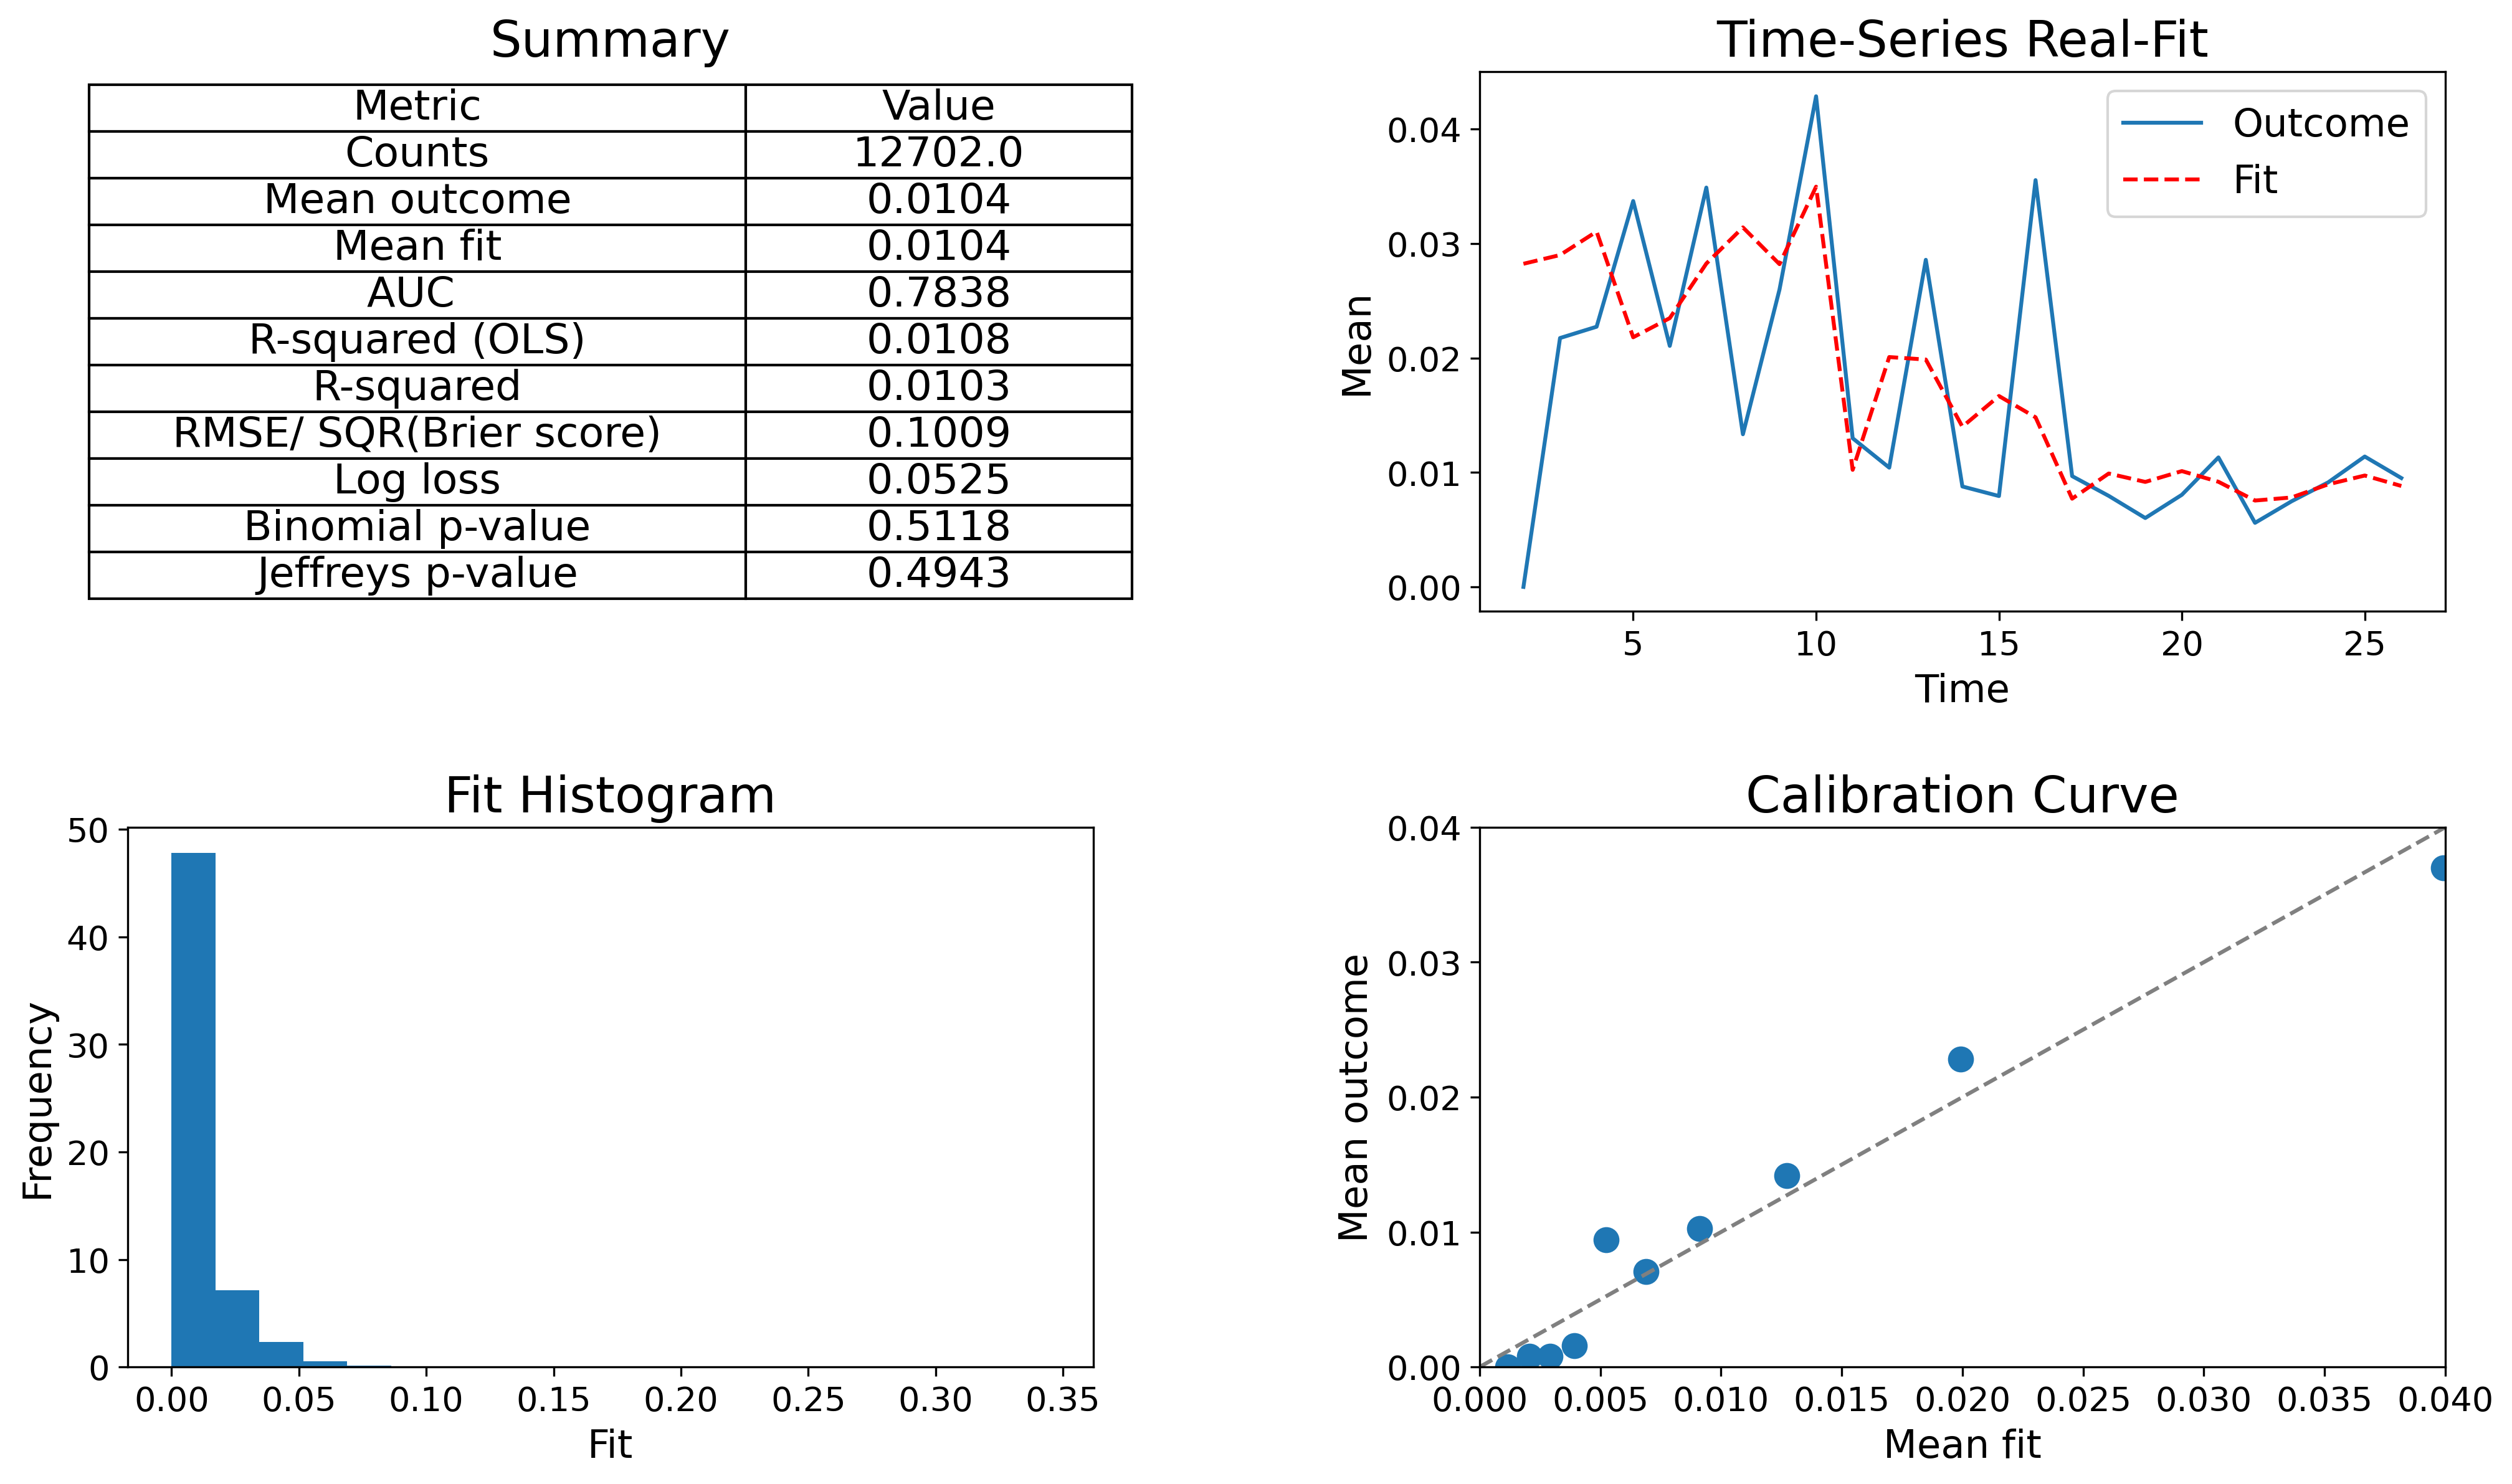

In [30]:
validation(predictions_train, y_train, data_train.loc[:, 'time'].values)

In [31]:
predictions_test = model_lr1.predict_proba(X_test_scaled)[:,1].T

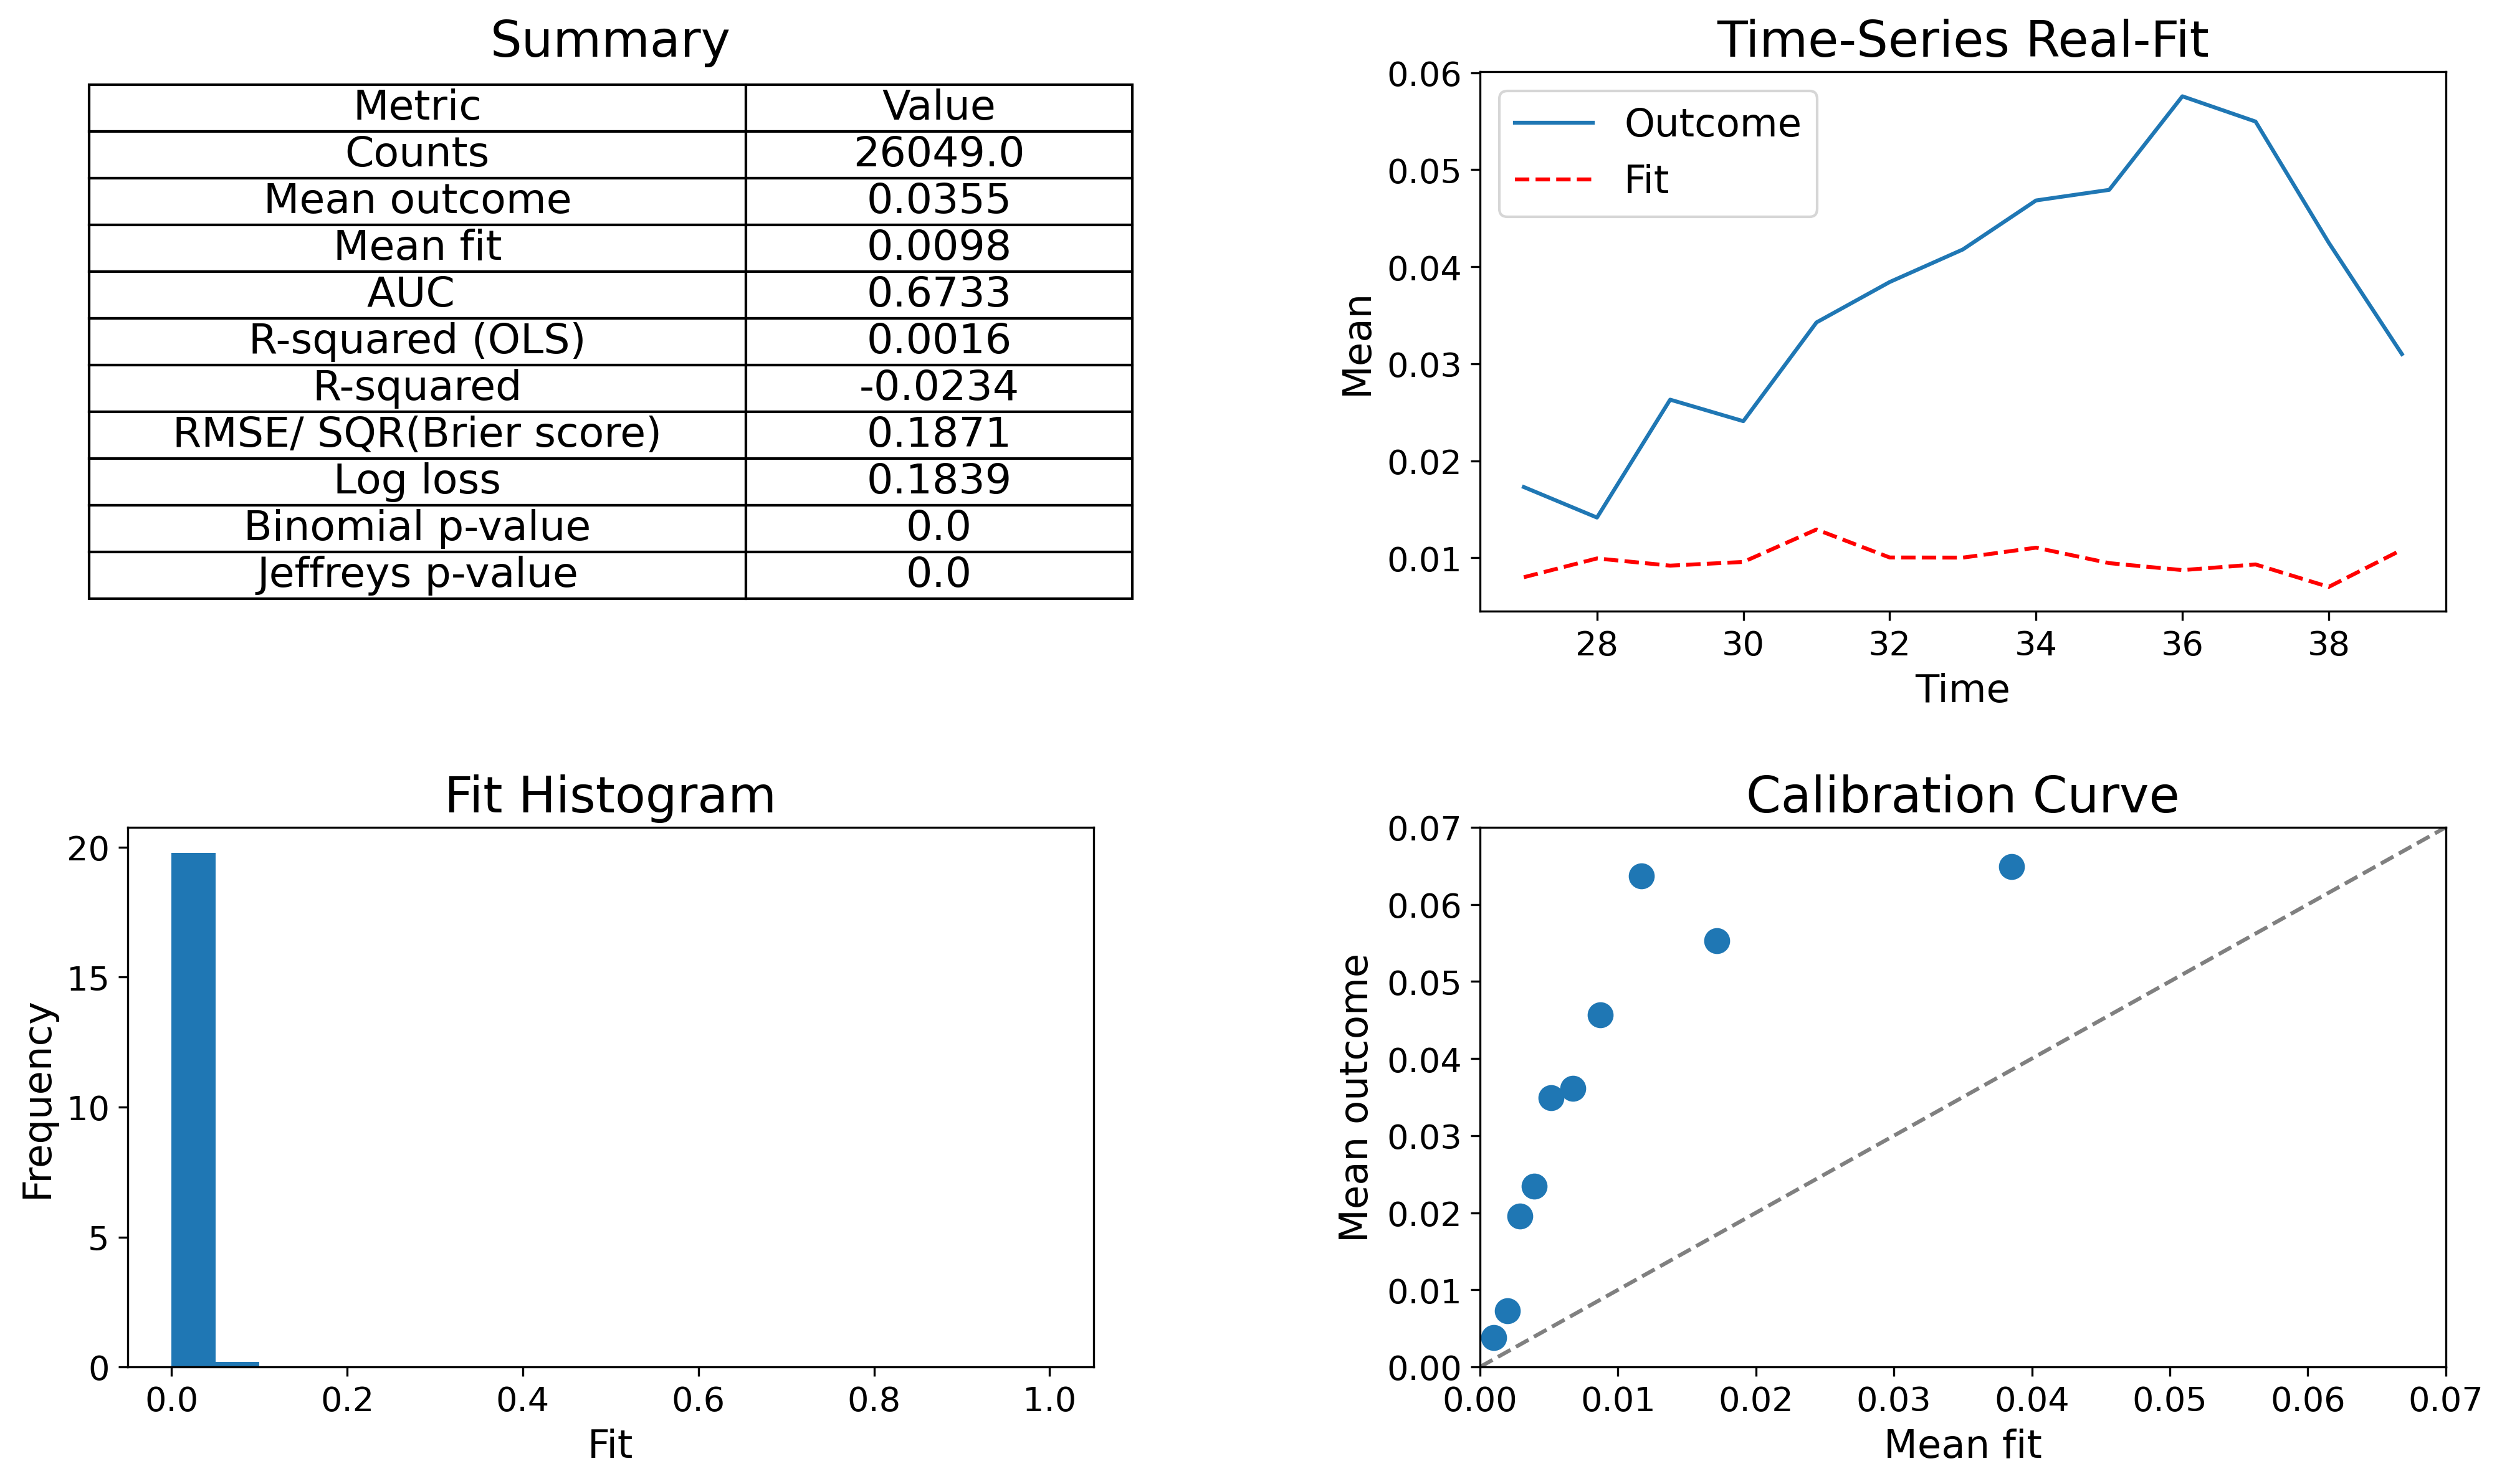

In [32]:
validation(predictions_test, y_test, data_test.loc[:, 'time'].values)

In [33]:
model_lr2 = LogisticRegression(penalty='l1', fit_intercept=True,C = 0.1 ,solver='saga',tol=1e-15, max_iter=10000)
model_lr2.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, max_iter=10000, penalty='l1', solver='saga',
                   tol=1e-15)

In [34]:
# Coefficients
model_lr2.coef_.round(decimals=4)

array([[-0.0763, -0.1403,  0.2736, -0.6955,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    , -0.0118,  0.    ]])

In [35]:
# Intercept
model_lr2.intercept_.round(decimals=4)

array([-4.9579])

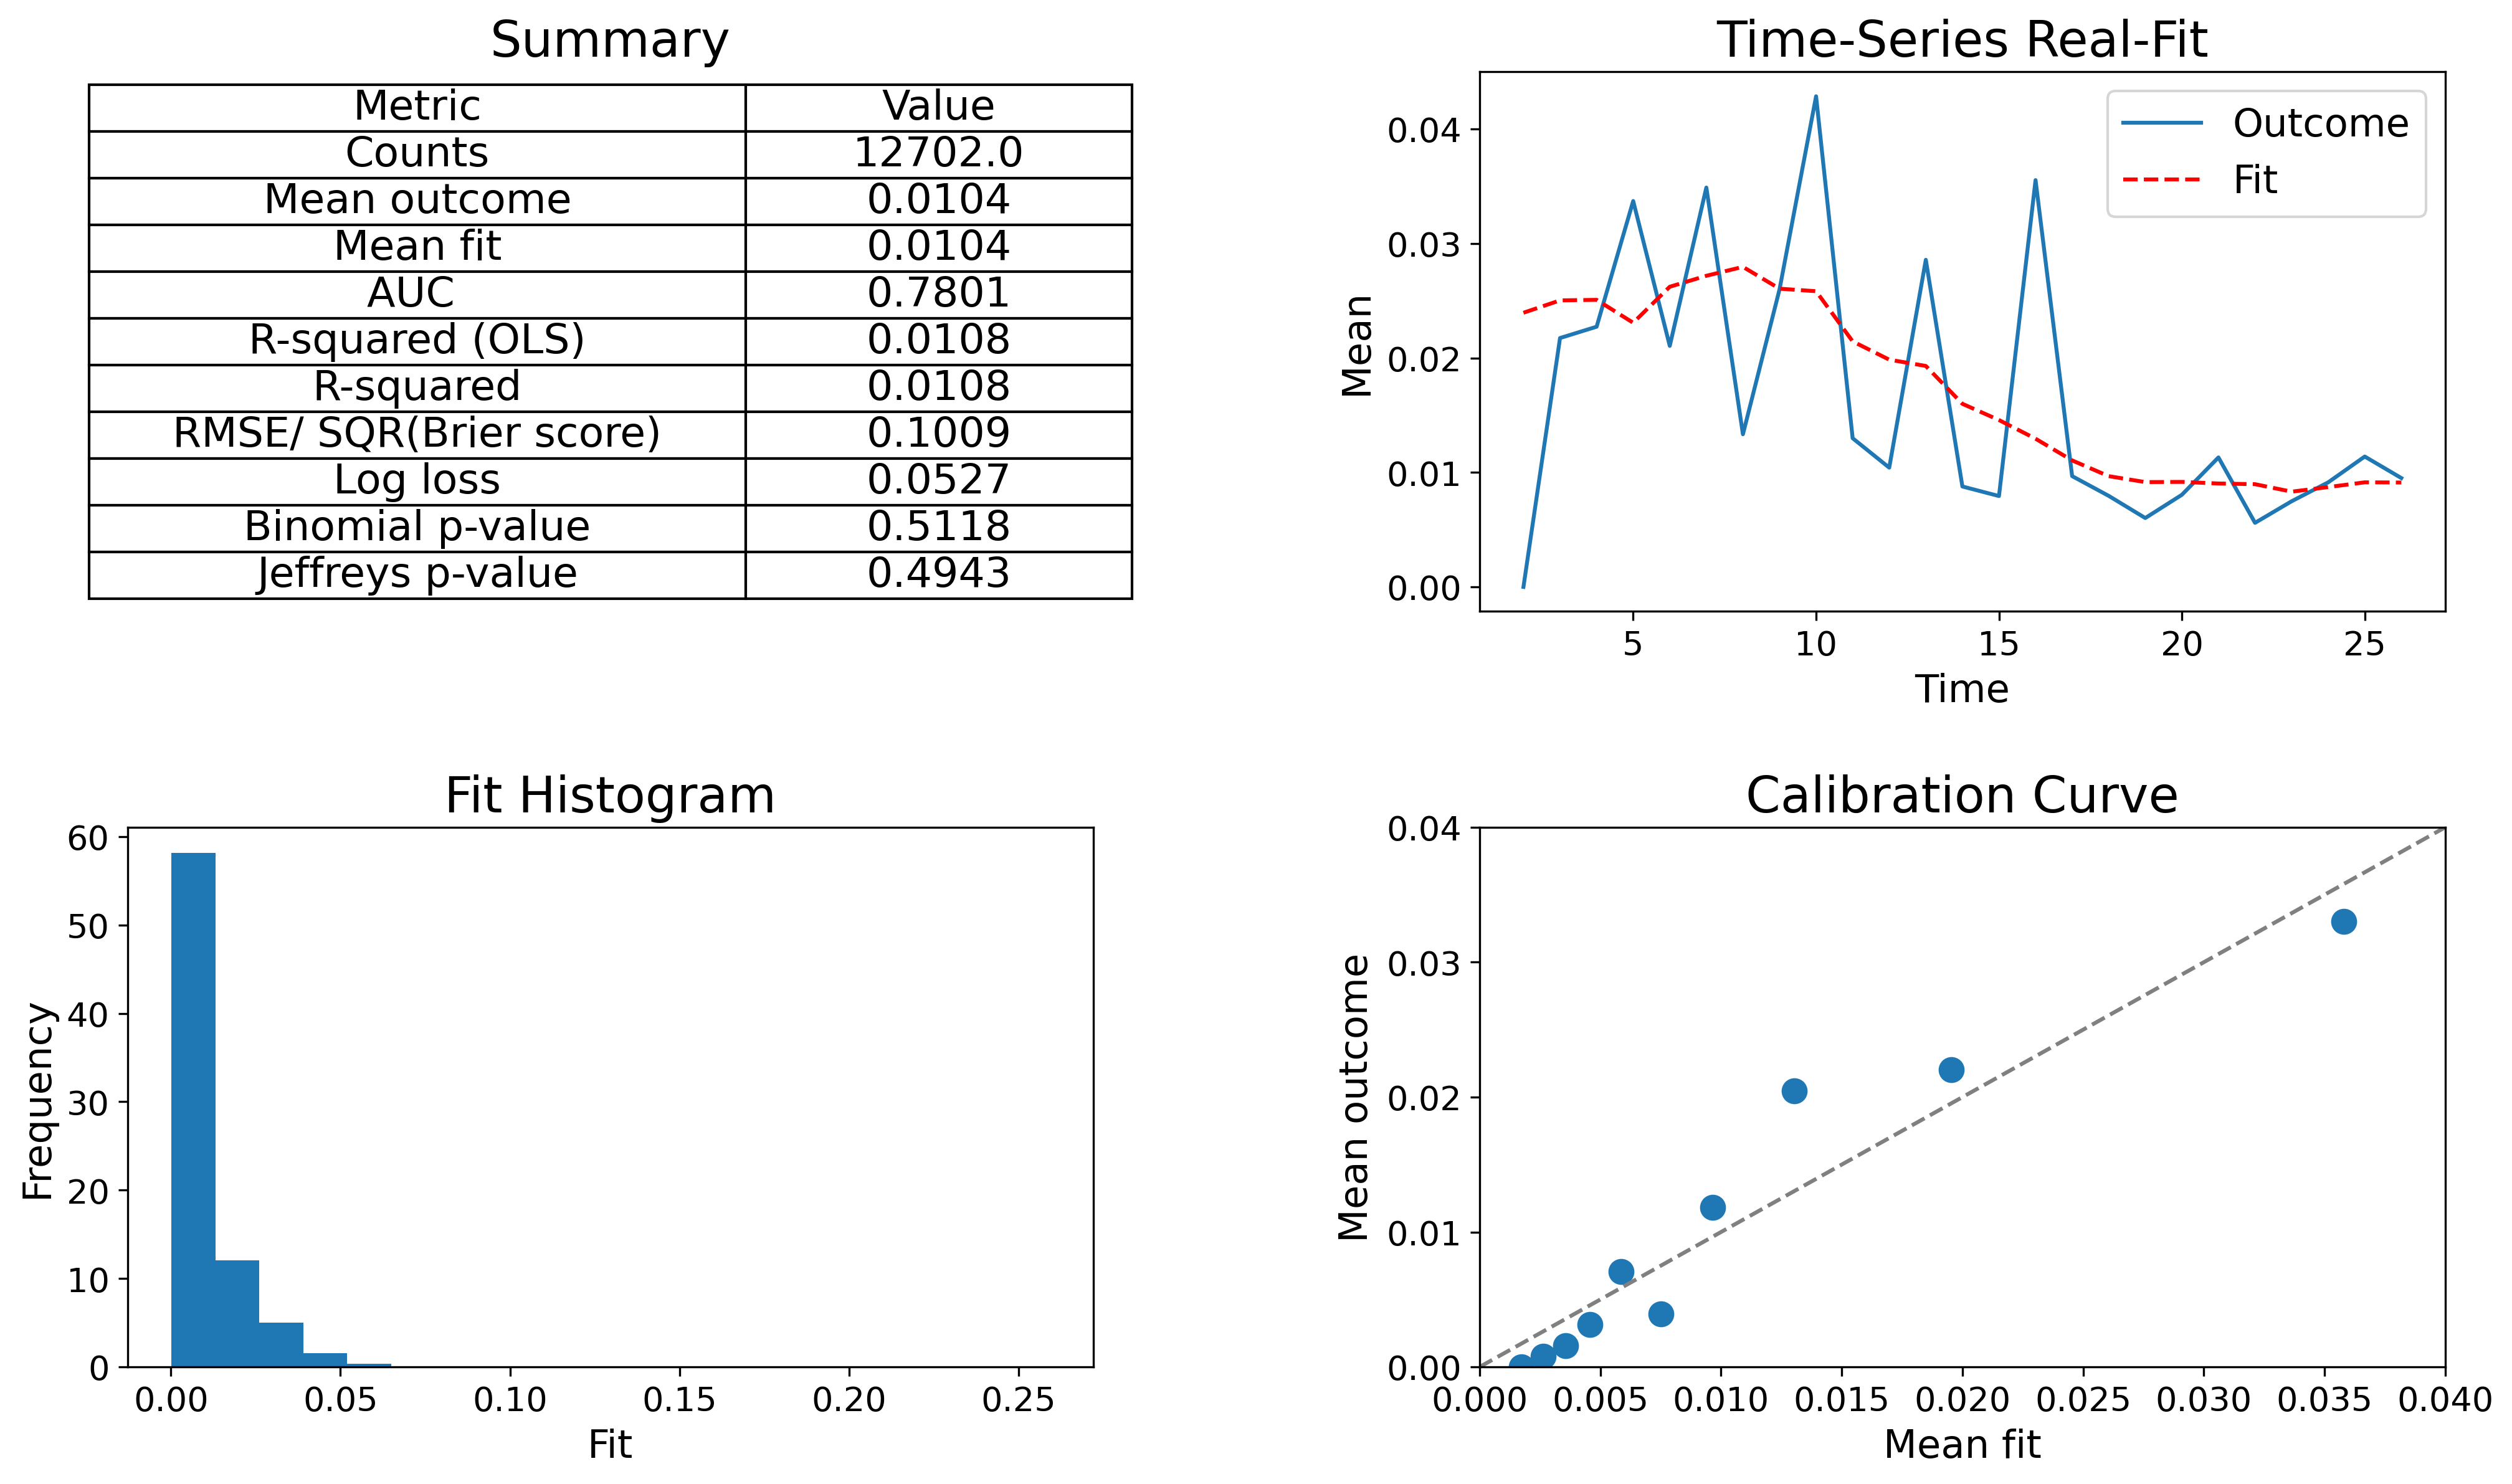

In [36]:
predictions_train = model_lr2.predict_proba(X_train_scaled)[:,1].T
validation(predictions_train, y_train, data_train.loc[:, 'time'].values)

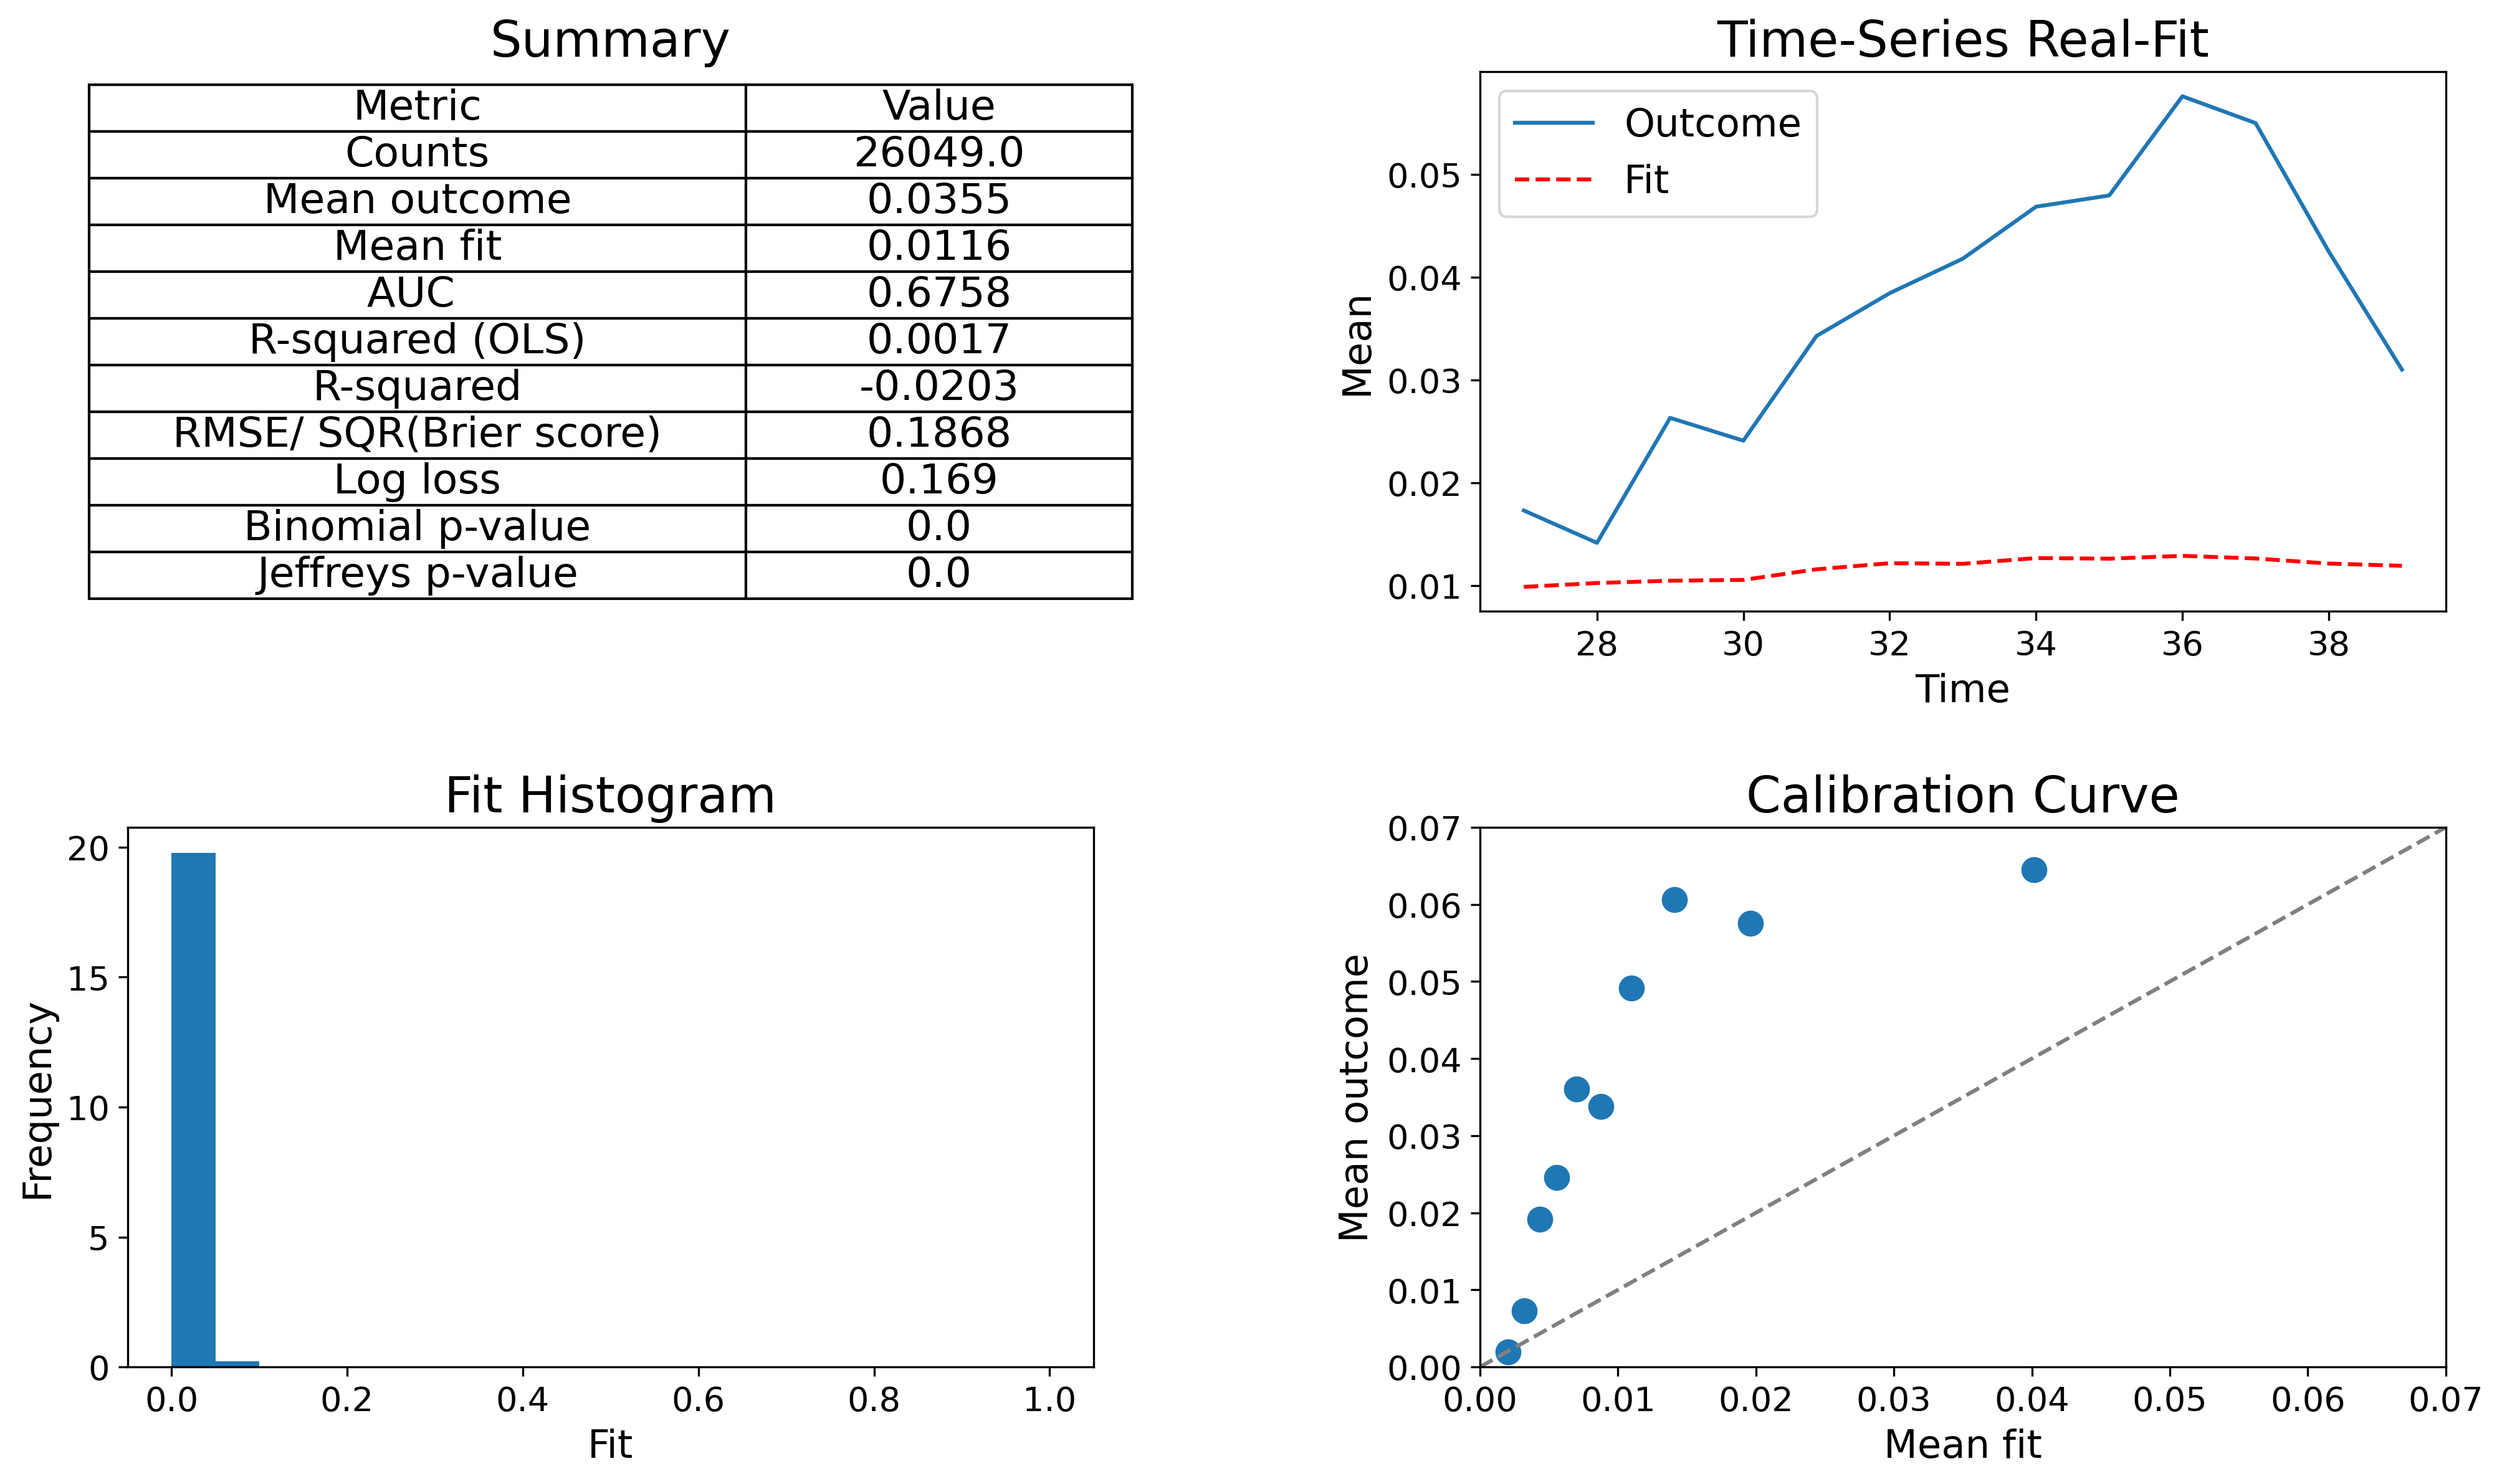

In [37]:
predictions_test = model_lr2.predict_proba(X_test_scaled)[:,1].T
validation(predictions_test, y_test, data_test.loc[:, 'time'].values)

# Comparing ROC Curves out-of-time

In [38]:
predictions_logit1 = model_lr1.predict_proba(X_test_scaled)[:,1].T
predictions_logit2 = model_lr2.predict_proba(X_test_scaled)[:,1].T

In [39]:
fpr1, tpr1, thresholdsl = roc_curve(y_test, predictions_logit1)
roc_auc1 = roc_auc_score(y_test, predictions_logit1)

# AUC Model1
round(roc_auc1,4)

0.6733

In [40]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, predictions_logit2)
roc_auc2 = roc_auc_score(y_test, predictions_logit2)

# AUC Model2
round(roc_auc2,4)

0.6758

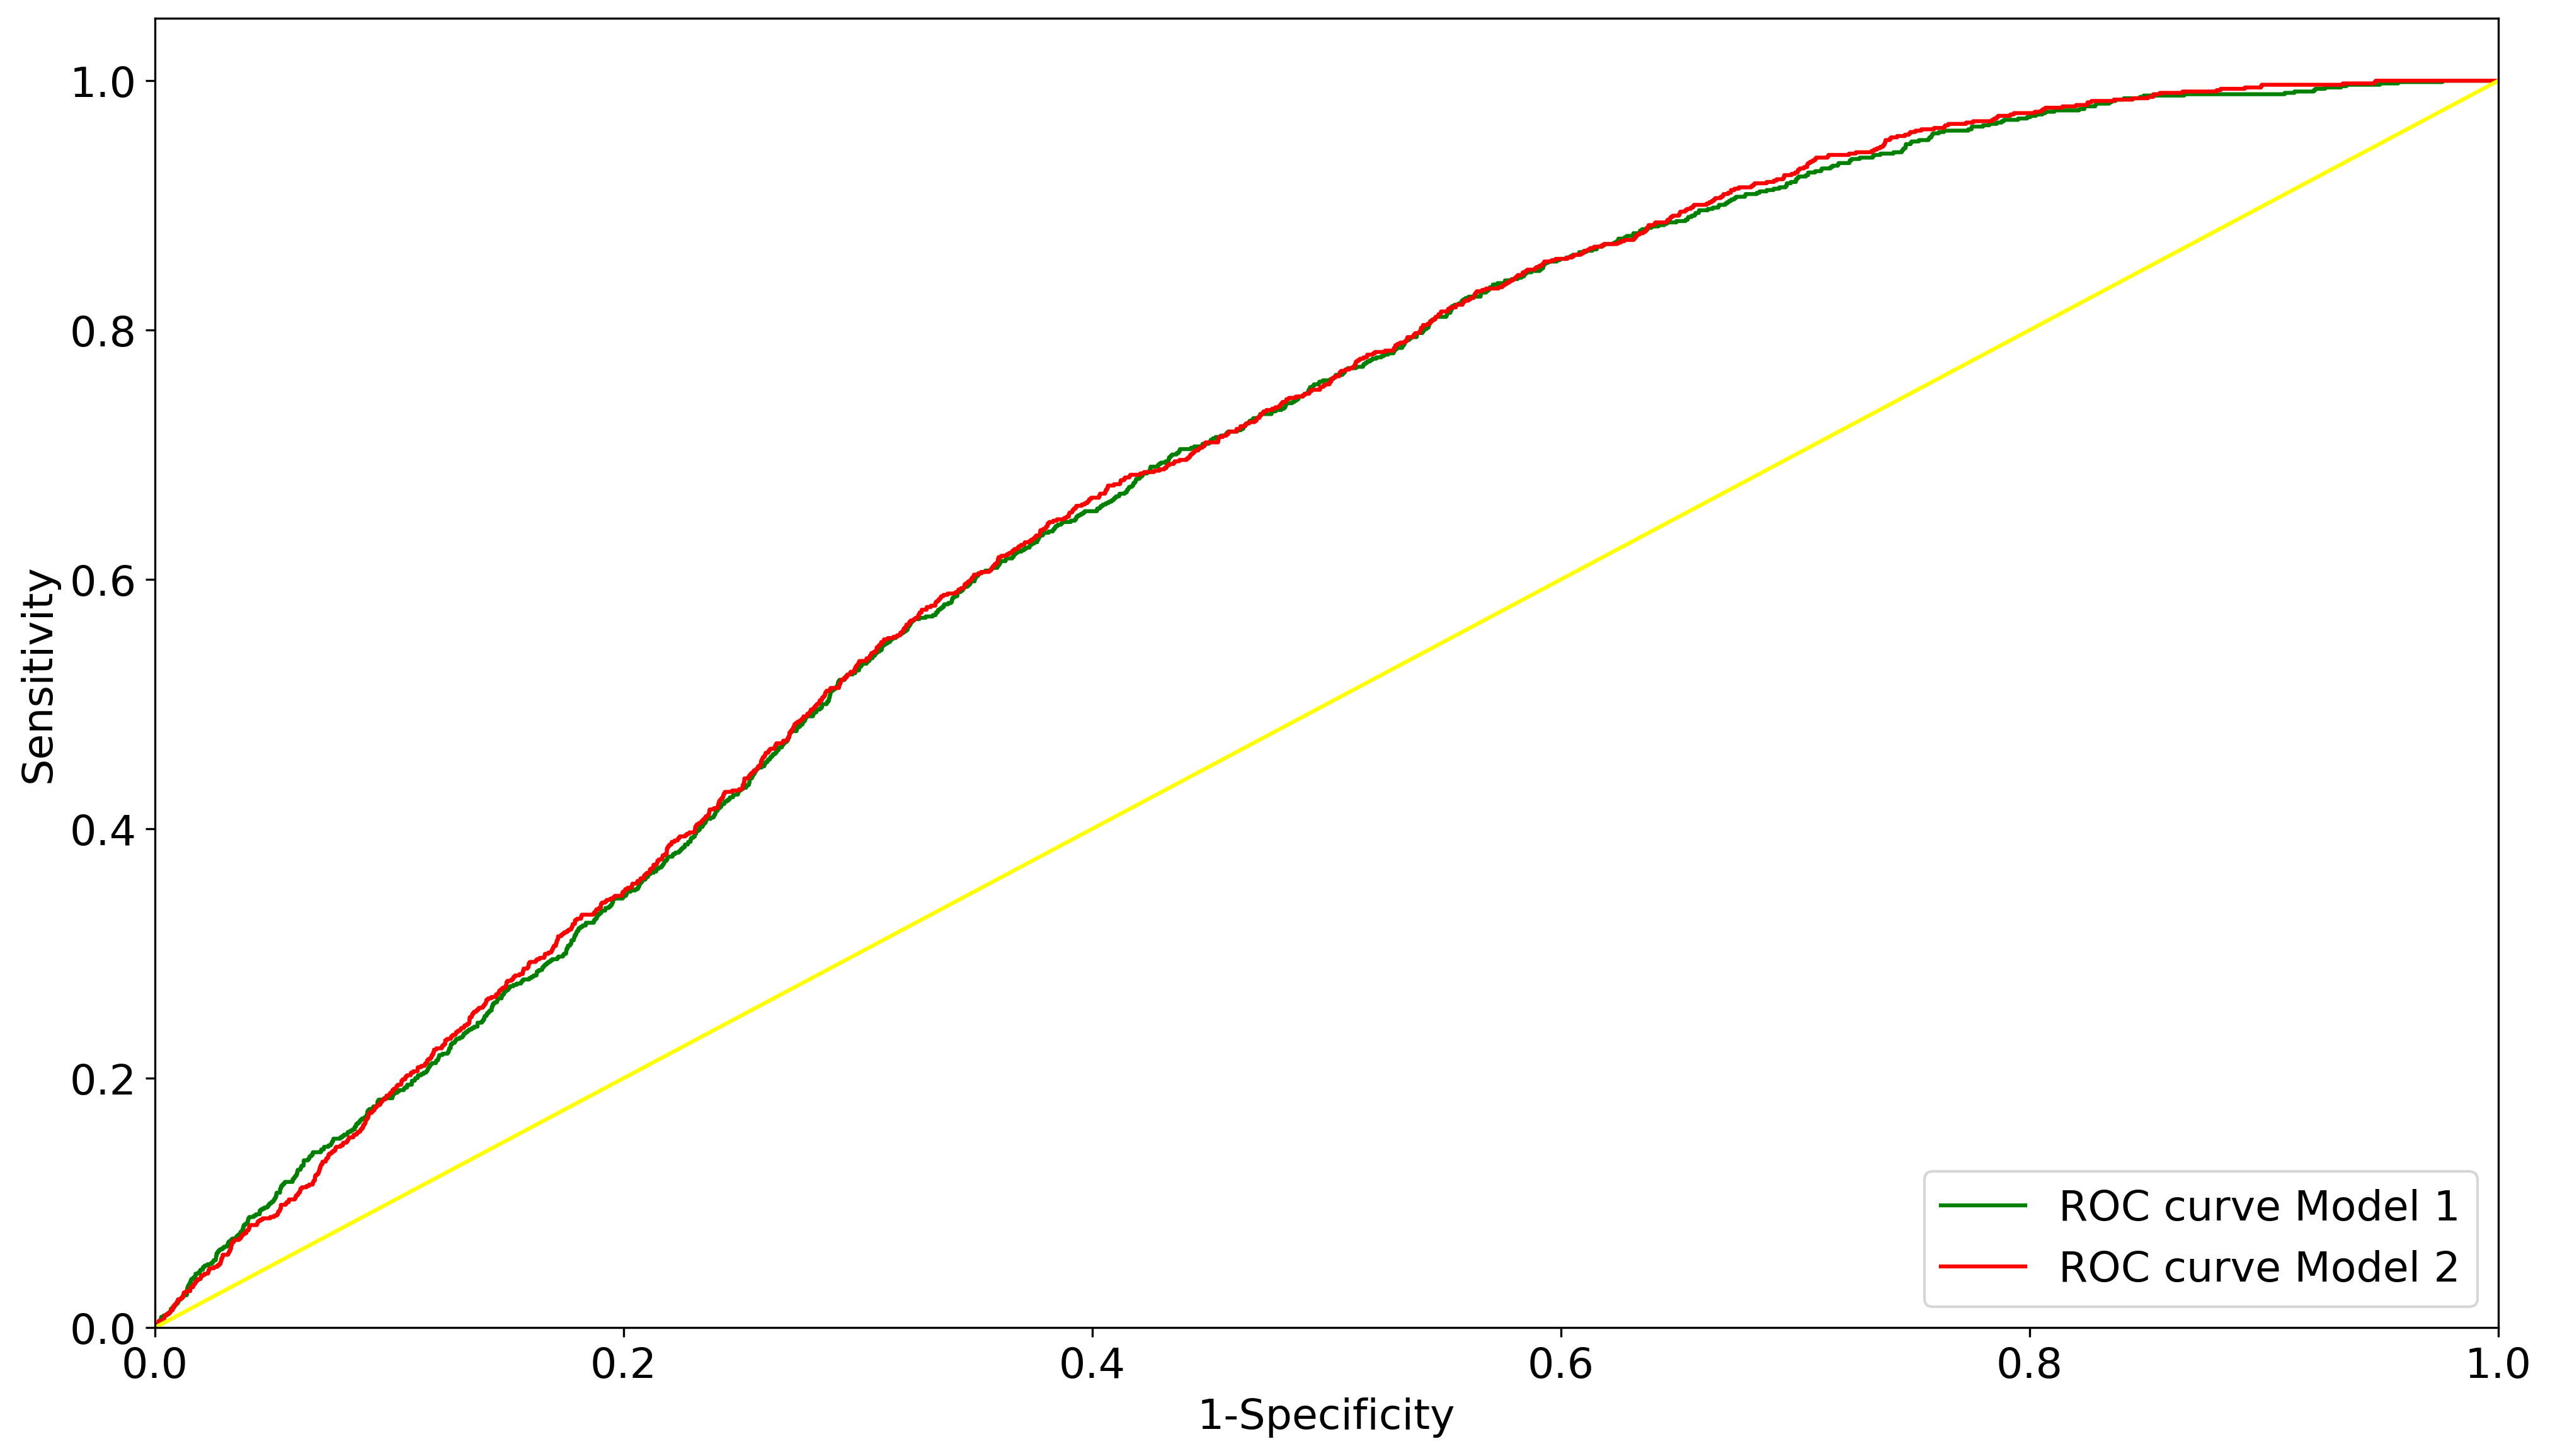

In [41]:
plt.figure()
plt.plot(fpr1, tpr1, color='green', label='ROC curve Model 1', linestyle = '-')
plt.plot(fpr2, tpr2, color='red', label='ROC curve Model 2', linestyle = '-')
plt.plot([0,1], [0,1], color='yellow', linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.ylabel('Sensitivity')
plt.xlabel('1-Specificity')
plt.legend(loc="lower right")
plt.show()

# Model stability

In [42]:
data_pdstab = data[['default_time', 'time', 'hpi_time']].copy()
data_pdstab.loc[:, 'time_dummy'] = np.where(data_pdstab['time'] > 26, 1, 0) & np.where(data_pdstab['time']<=40,1,0)
data_pdstab.loc[:,'interact_hpi'] = data_pdstab['hpi_time']*data_pdstab['time_dummy']
data_pdstab.head().round(decimals = 2)

,default_time,time,hpi_time,time_dummy,interact_hpi
0,0,25,226.29,0,0.00
1,0,26,225.10,0,0.00
2,0,27,222.39,1,222.39
3,0,28,219.67,1,219.67
4,0,29,217.37,1,217.37


In [43]:
x = data_pdstab[['hpi_time', 'interact_hpi', 'time_dummy']]
y = data_pdstab['default_time'].values.reshape(-1,)

X_logit = sm.add_constant(x, prepend=False)
logit_model = sm.Logit(y, X_logit).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.120174
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                40563
Model:                          Logit   Df Residuals:                    40559
Method:                           MLE   Df Model:                            3
Date:                Thu, 13 Jun 2024   Pseudo R-squ.:                 0.03467
Time:                        20:08:25   Log-Likelihood:                -4874.6
converged:                       True   LL-Null:                       -5049.7
Covariance Type:            nonrobust   LLR p-value:                 1.406e-75
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
hpi_time        -0.0086      0.002     -3.496      0.000      -0.013      -0.004
interact_hpi    -0.0047      0.003     -1.689      0.091      -0.010       0.001
time_dummy       1.9191      0.549      3.494      0.000       0.843       2.995
const           -2.7905      0.493     -5.656      0.000      -3.757      -1.824
================================================================================
"""

In [44]:
def PD_fun(HPI):
    linpred1 = -2.7905 - 0.0086 *HPI
    linpred2 = -1.0307 - 0.0125*HPI
    
    PD1 = np.exp(linpred1) / (1 + np.exp(linpred1))
    PD2 = np.exp(linpred2) / (1 + np.exp(linpred2))
    
    return PD1, PD2

In [45]:
x = np.linspace(0,250,50)
HPI = x
PD_pred = PD_fun(HPI)

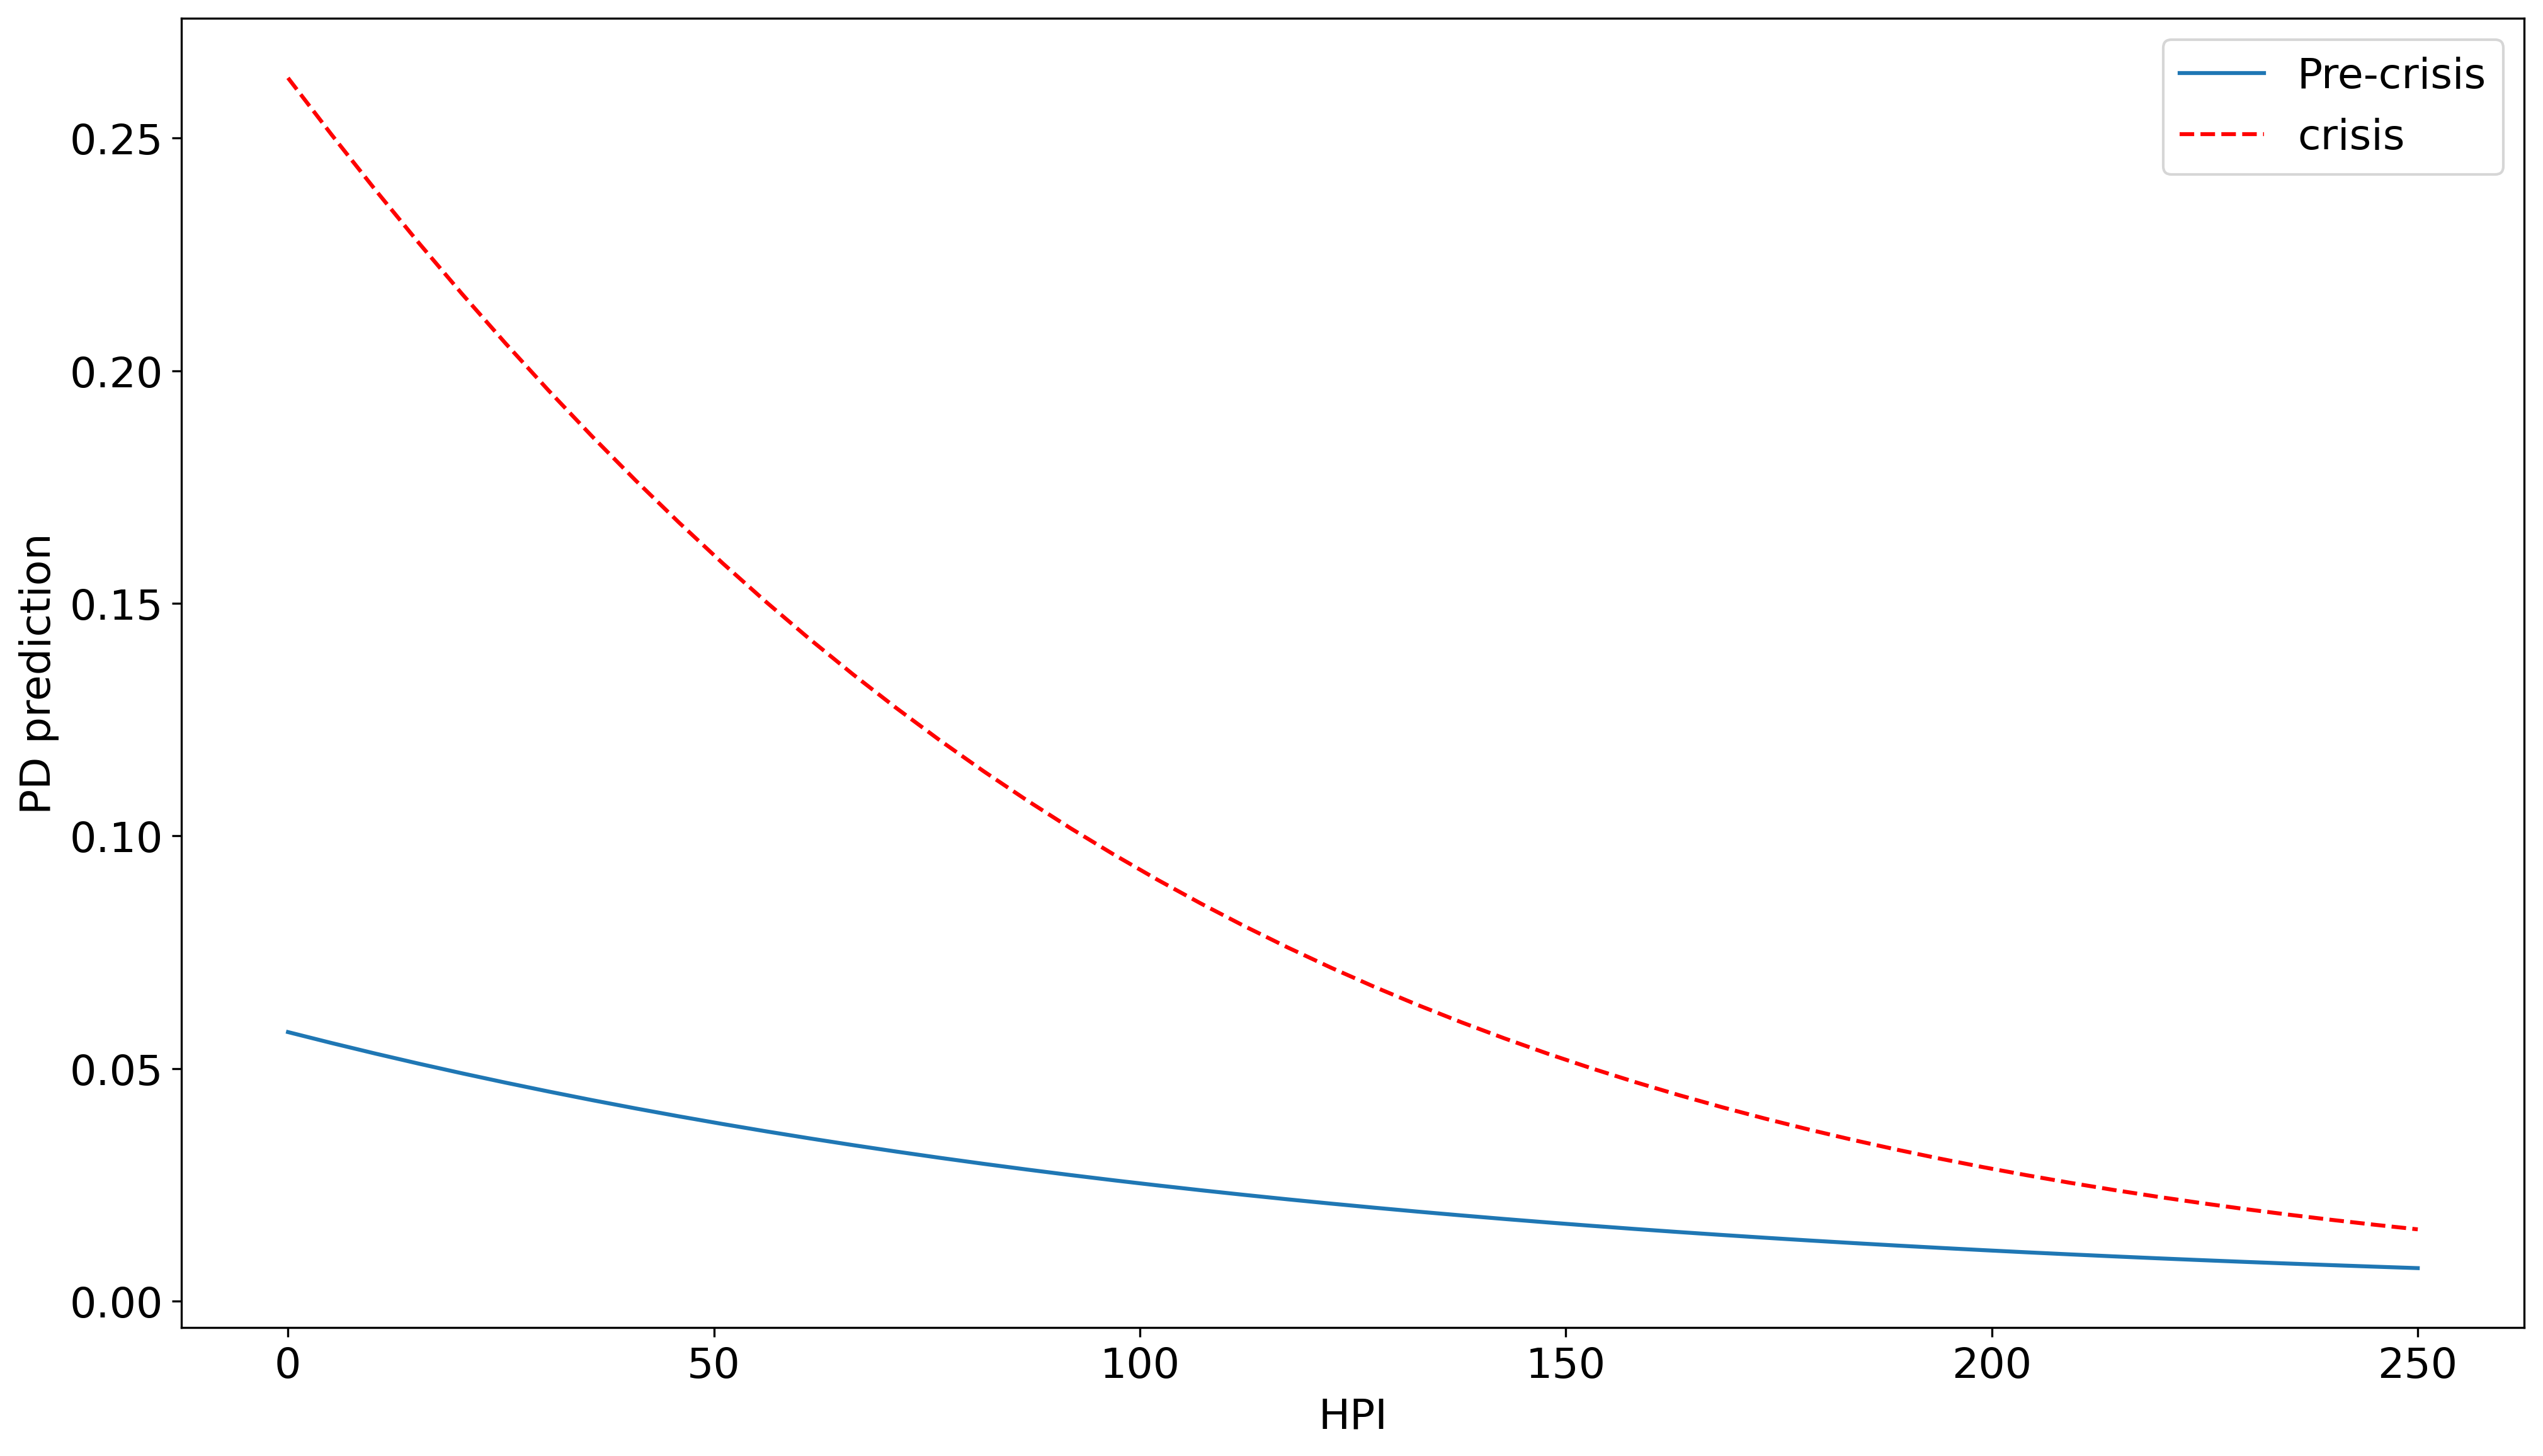

In [46]:
plt.plot(HPI, PD_pred[0], label='Pre-crisis')
plt.plot(HPI, PD_pred[1], color = 'red', label='crisis', linestyle = 'dashed')
plt.ylabel('PD prediction')
plt.xlabel('HPI')
plt.legend(loc="best")
plt.show()